<a href="https://colab.research.google.com/github/Wasabi-Bobby/MachineLearningHomework/blob/master/HW2_Machine_Learning_bb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from keras.datasets import cifar10

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = cifar10.load_data()

170500096/170498071 [==============================] - 15s 0us/step


Preparing image and labels
-------------



In [0]:
train_images_original.shape

(50000, 32, 32, 3)

In [0]:
test_images_original.shape

(10000, 32, 32, 3)

In [0]:
train_images = train_images_original.reshape((50000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original)
test_labels = to_categorical(test_labels_original)

Some nice code snippet i found for shuffling two arrays on github. Link -> https://stackoverflow.com/questions/4601373/better-way-to-shuffle-two-numpy-arrays-in-unison

In [0]:
import numpy as np
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

Testing this just in case
----------------------------
It works!

In [15]:
x = np.array([1,2,3,4])
y = np.array([1,2,3,4])
random_x, random_y = unison_shuffled_copies(x, y)
print(random_x)
print(random_y)

[2 4 1 3]
[2 4 1 3]


Shuffling step + Validation set
--------------------
Creating Validation and Test set from the data (Not k-fold iteration kind of validation)

Actually going to ignore this valid set section for now since keras has a way to set the percentage of a validation set...

In [0]:
#Shuffling array
random_train_images, random_train_labels = unison_shuffled_copies(train_images, train_labels)
#valid_set = [(random_train_images

Creating K-fold training data set, labels and images
-----------------------------------------------------------------

In [0]:
import random
# Greatest index we can start at is length of the array - 10 percent of length of array
# 10% of our current data will be used for k-fold
greatest_index = len(random_train_images) - len(random_train_images) * .1
starting_index = random.randint(0, greatest_index)
last_index = int(len(random_train_images) * 0.1) + starting_index

k_fold_train_images = random_train_images[starting_index:last_index]
k_fold_train_labels = random_train_labels[starting_index:last_index]


Network Architecture 1
----------------------------
Just going to have about 4 convolutional layers and do four max pools

Basic architecture

In [2]:
from keras import models
from keras import layers

model_one = models.Sequential()
model_one.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
#model_one.add(layers.MaxPooling2D((2, 2)))
model_one.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model_one.add(layers.MaxPooling2D(2, 2))
model_one.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_one.add(layers.Flatten())
model_one.add(layers.Dense(64, activation='relu'))
model_one.add(layers.Dense(10, activation='softmax'))
model_one.summary()

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 2,825,930
Trainable params: 2,825,930
Non-trainable para

Network Architecture 2
---------------------------
Now with maxpooling!

In [3]:
model_two = models.Sequential()
model_two.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_two.add(layers.MaxPooling2D((2, 2)))
model_two.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_two.add(layers.MaxPooling2D(2, 2))
model_two.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_two.add(layers.MaxPooling2D(2, 2))
model_two.add(layers.Flatten())
model_two.add(layers.Dense(64, activation='relu'))
model_two.add(layers.Dense(10, activation='softmax'))
model_two.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

Network Architecture 3, 4, 5, 6
-----------------------------
Just kinda messing around with different layers and pooling and the epochs should be 5 for each

In [4]:
model_three = models.Sequential()
#massive filter for the first layer
model_three.add(layers.Conv2D(64, (9, 9), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_three.add(layers.MaxPooling2D((2, 2)))
model_three.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_three.add(layers.MaxPooling2D(2, 2))
model_three.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_three.add(layers.MaxPooling2D(2, 2))
model_three.add(layers.Flatten())
model_three.add(layers.Dense(64, activation='relu'))
model_three.add(layers.Dense(10, activation='softmax'))
model_three.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 24, 24, 64)        15616     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 32)        18464     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 32)                0         
__________

In [0]:
model_four = models.Sequential()
model_four.add(layers.Conv2D(128, (9, 9), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_four.add(layers.MaxPooling2D((2, 2)))
model_four.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_four.add(layers.MaxPooling2D(2, 2))
model_four.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_four.add(layers.MaxPooling2D(2, 2))
model_four.add(layers.Flatten())
model_four.add(layers.Dense(64, activation='relu'))
model_four.add(layers.Dense(10, activation='softmax'))
model_four.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 24, 24, 128)       31232     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        36896     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 3, 3, 32)          9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 1, 1, 32)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 32)                0         
__________

In [0]:
# Hashtag dropout
model_five = models.Sequential()
model_five.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_five.add(layers.MaxPooling2D((2, 2)))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_five.add(layers.MaxPooling2D(2, 2))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_five.add(layers.MaxPooling2D(2, 2))
model_five.add(layers.Dropout(0.25))
model_five.add(layers.Flatten())
model_five.add(layers.Dense(64, activation='relu'))
model_five.add(layers.Dense(10, activation='softmax'))
model_five.summary()

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 6, 6, 32)          0         
___________________________

In [0]:
model_six = models.Sequential()
model_six.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=(32, 32, 3), data_format="channels_last"))
model_six.add(layers.MaxPooling2D((2, 2)))
model_six.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_six.add(layers.MaxPooling2D(2, 2))
model_six.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_six.add(layers.MaxPooling2D(2, 2))
model_six.add(layers.Flatten())
model_six.add(layers.Dense(64, activation='relu'))
model_six.add(layers.Dense(10, activation='softmax'))
model_six.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 30, 30, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 13, 13, 32)        4640      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 128)               0         
__________

K_model initialization
------------------------------------

In [50]:
k_model_one   = model_one
k_model_one.summary()
k_model_two   = model_two
k_model_three = model_three

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 43264)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2768960   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 2,825,930
Trainable params: 2,825,930
Non-trainable params: 0
_________________________________________________________________


Compilation
------------------------------

In [0]:
model_one.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_two.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_three.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_four.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_five.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
model_six.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [0]:
k_model_one.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
k_model_two.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
k_model_three.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Training without k-fold
----------------------------

In [0]:
epochs = 5
history_one = model_one.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Instructions for updating:
Use tf.cast instead.
Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 348s 9ms/step - loss: 1.6956 - acc: 0.3996 - val_loss: 1.6755 - val_acc: 0.4130
Epoch 2/5
40000/40000 [==============================] - 346s 9ms/step - loss: 1.2196 - acc: 0.5731 - val_loss: 1.0978 - val_acc: 0.6149
Epoch 3/5
40000/40000 [==============================] - 348s 9ms/step - loss: 0.9807 - acc: 0.6598 - val_loss: 1.0709 - val_acc: 0.6199
Epoch 4/5
40000/40000 [==============================] - 350s 9ms/step - loss: 0.7869 - acc: 0.7278 - val_loss: 1.0587 - val_acc: 0.6375
Epoch 5/5
40000/40000 [==============================] - 351s 9ms/step - loss: 0.6069 - acc: 0.7898 - val_loss: 1.0890 - val_acc: 0.6462


In [0]:
epochs = 10
history_two = model_two.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.9275 - acc: 0.2923 - val_loss: 1.9372 - val_acc: 0.3188
Epoch 2/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.6369 - acc: 0.4078 - val_loss: 1.6014 - val_acc: 0.4073
Epoch 3/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.5116 - acc: 0.4544 - val_loss: 1.4717 - val_acc: 0.4636
Epoch 4/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.4149 - acc: 0.4936 - val_loss: 1.5488 - val_acc: 0.4568
Epoch 5/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.3382 - acc: 0.5219 - val_loss: 1.3031 - val_acc: 0.5372
Epoch 6/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.2758 - acc: 0.5480 - val_loss: 1.2674 - val_acc: 0.5518
Epoch 7/10
40000/40000 [==============================] - 42s 1ms/step - loss: 1.2242 - acc: 0.5670 - val_loss: 1.2219 - val_acc

In [0]:
epochs_three = 20
history_three = model_two.fit(train_images,
                           train_labels,
                           epochs=epochs_three,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 42s 1ms/step - loss: 1.0806 - acc: 0.6195 - val_loss: 1.1498 - val_acc: 0.5953
Epoch 2/20
40000/40000 [==============================] - 42s 1ms/step - loss: 1.0570 - acc: 0.6287 - val_loss: 1.1561 - val_acc: 0.5968
Epoch 3/20
40000/40000 [==============================] - 42s 1ms/step - loss: 1.0350 - acc: 0.6344 - val_loss: 1.2375 - val_acc: 0.5799
Epoch 4/20
40000/40000 [==============================] - 42s 1ms/step - loss: 1.0114 - acc: 0.6440 - val_loss: 1.0672 - val_acc: 0.6268
Epoch 5/20
40000/40000 [==============================] - 42s 1ms/step - loss: 0.9914 - acc: 0.6496 - val_loss: 1.3656 - val_acc: 0.5516
Epoch 6/20
40000/40000 [==============================] - 42s 1ms/step - loss: 0.9726 - acc: 0.6581 - val_loss: 1.2080 - val_acc: 0.5856
Epoch 7/20
40000/40000 [==============================] - 42s 1ms/step - loss: 0.9529 - acc: 0.6653 - val_loss: 1.1153 - val_acc

In [0]:
epochs = 10
history_four = model_three.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 118s 3ms/step - loss: 2.0370 - acc: 0.2587 - val_loss: 1.8930 - val_acc: 0.3031
Epoch 2/10
40000/40000 [==============================] - 115s 3ms/step - loss: 1.7443 - acc: 0.3753 - val_loss: 1.6567 - val_acc: 0.4013
Epoch 3/10
40000/40000 [==============================] - 115s 3ms/step - loss: 1.6190 - acc: 0.4188 - val_loss: 1.6186 - val_acc: 0.4274
Epoch 4/10
40000/40000 [==============================] - 114s 3ms/step - loss: 1.5392 - acc: 0.4516 - val_loss: 1.5668 - val_acc: 0.4357
Epoch 5/10
40000/40000 [==============================] - 113s 3ms/step - loss: 1.4767 - acc: 0.4731 - val_loss: 1.5468 - val_acc: 0.4433
Epoch 6/10
40000/40000 [==============================] - 114s 3ms/step - loss: 1.4269 - acc: 0.4903 - val_loss: 1.6963 - val_acc: 0.4214
Epoch 7/10
40000/40000 [==============================] - 113s 3ms/step - loss: 1.3809 - acc: 0.5073 - val_loss: 1.4067 - 

In [0]:
epochs = 10
history_five = model_four.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 180s 4ms/step - loss: 2.0695 - acc: 0.2305 - val_loss: 1.8564 - val_acc: 0.3107
Epoch 2/10
40000/40000 [==============================] - 177s 4ms/step - loss: 1.7821 - acc: 0.3569 - val_loss: 1.7671 - val_acc: 0.3636
Epoch 3/10
40000/40000 [==============================] - 179s 4ms/step - loss: 1.6490 - acc: 0.4066 - val_loss: 1.6603 - val_acc: 0.4070
Epoch 4/10
40000/40000 [==============================] - 177s 4ms/step - loss: 1.5663 - acc: 0.4357 - val_loss: 1.6364 - val_acc: 0.4008
Epoch 5/10
40000/40000 [==============================] - 178s 4ms/step - loss: 1.5044 - acc: 0.4582 - val_loss: 1.6413 - val_acc: 0.4212
Epoch 6/10
40000/40000 [==============================] - 177s 4ms/step - loss: 1.4573 - acc: 0.4762 - val_loss: 1.5424 - val_acc: 0.4463
Epoch 7/10
40000/40000 [==============================] - 178s 4ms/step - loss: 1.4129 - acc: 0.4957 - val_loss: 1.4596 - 

In [0]:
epochs = 10
history_six = model_five.fit(train_images,
                           train_labels,
                           epochs=epochs,
                           validation_split=0.2,
                           batch_size=128)

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.9831 - acc: 0.2621 - val_loss: 1.7268 - val_acc: 0.3823
Epoch 2/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.6974 - acc: 0.3768 - val_loss: 1.6735 - val_acc: 0.3878
Epoch 3/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.5802 - acc: 0.4207 - val_loss: 1.6500 - val_acc: 0.4075
Epoch 4/10
40000/40000 [==============================] - 62s 2ms/step - loss: 1.5013 - acc: 0.4564 - val_loss: 1.4441 - val_acc: 0.4818
Epoch 5/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.4393 - acc: 0.4772 - val_loss: 1.3480 - val_acc: 0.5244
Epoch 6/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.3925 - acc: 0.4980 - val_loss: 1.3328 - val_acc: 0.5328
Epoch 7/10
40000/40000 [==============================] - 63s 2ms/step - loss: 1.3494 - acc: 0.5143 - val_loss: 1.2917 - val_acc

Training With K-fold
----------------------------

In [91]:
# k_fold_train_images = random_train_images[starting_index:last_index]
# k_fold_train_labels = random_train_labels[starting_index:last_index]
k_history_one = k_history_two = k_history_three = []

for i in range(10):
  current_index = int(len(k_fold_train_images) * 0.1)
  
  validation_images = k_fold_train_images[i*current_index:(i+1)*current_index]
  #print(validation_images)
  validation_labels = k_fold_train_labels[i*current_index:(i+1)*current_index]
  
  x = k_fold_train_images[0 : i*current_index:(i+1)]
  y = k_fold_train_images[int((i+1)*current_index) : int(len(k_fold_train_images))]
  
  current_k_fold_train_images = np.concatenate((x,y))
  current_k_fold_train_labels =  np.concatenate((k_fold_train_labels[0:i*current_index:(i+1)], k_fold_train_labels[(i+1)*current_index:len(k_fold_train_labels)]))
  
  validation_data = (validation_images, validation_labels)
  
  k_history_one.append(k_model_one.fit(current_k_fold_train_images,current_k_fold_train_labels,
                   epochs=1,
                   validation_data=(current_k_fold_train_images,current_k_fold_train_labels)))
  k_history_two.append(k_model_one.fit(current_k_fold_train_images,current_k_fold_train_labels,
                   epochs=1,
                   validation_data=(current_k_fold_train_images,current_k_fold_train_labels)))
  k_history_three.append(k_model_one.fit(current_k_fold_train_images,current_k_fold_train_labels,
                   epochs=1,
                   validation_data=(current_k_fold_train_images,current_k_fold_train_labels)))
  

Train on 4500 samples, validate on 4500 samples
Epoch 1/1
4500/4500 [==============================] - 47s 11ms/step - loss: 0.0698 - acc: 0.9793 - val_loss: 0.0290 - val_acc: 0.9900
Train on 4500 samples, validate on 4500 samples
Epoch 1/1
4500/4500 [==============================] - 48s 11ms/step - loss: 0.0362 - acc: 0.9904 - val_loss: 0.0175 - val_acc: 0.9944
Train on 4500 samples, validate on 4500 samples
Epoch 1/1
4500/4500 [==============================] - 47s 11ms/step - loss: 0.0434 - acc: 0.9889 - val_loss: 0.6245 - val_acc: 0.8893
Train on 4250 samples, validate on 4250 samples
Epoch 1/1
4250/4250 [==============================] - 45s 11ms/step - loss: 0.0503 - acc: 0.9892 - val_loss: 0.0127 - val_acc: 0.9958
Train on 4250 samples, validate on 4250 samples
Epoch 1/1
4250/4250 [==============================] - 45s 11ms/step - loss: 0.0311 - acc: 0.9894 - val_loss: 0.0017 - val_acc: 0.9998
Train on 4250 samples, validate on 4250 samples
Epoch 1/1
4250/4250 [================

40


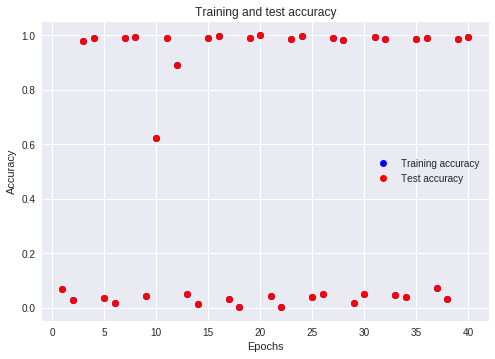

In [119]:
import matplotlib.pyplot as plt
loss_values = test_loss_values = acc_values = test_acc_values = []
for i in range(10):
  history_dict = k_history_one[i].history
  loss_values.append(history_dict['loss'])
  test_loss_values.append(history_dict['val_loss'])
  acc_values.append(history_dict['acc'])
  test_acc_values.append(history_dict['val_acc'])

epochs_range = range(1, 40 + 1)
print(len(acc_values))


plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40


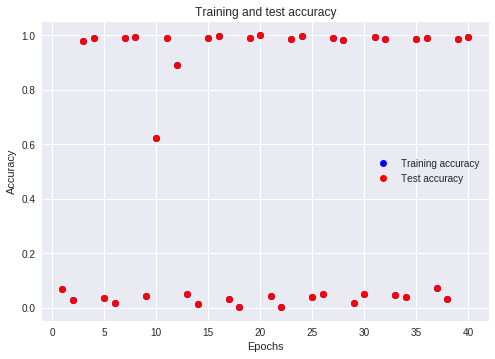

In [118]:
loss_values = test_loss_values = acc_values = test_acc_values = []
for i in range(10):
  history_dict = k_history_two[i].history
  loss_values.append(history_dict['loss'])
  test_loss_values.append(history_dict['val_loss'])
  acc_values.append(history_dict['acc'])
  test_acc_values.append(history_dict['val_acc'])

epochs_range = range(1, 40 + 1)
print(len(acc_values))


plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

40


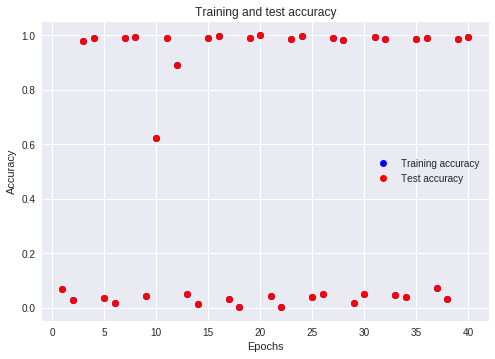

In [120]:
loss_values = test_loss_values = acc_values = test_acc_values = []
for i in range(10):
  history_dict = k_history_three[i].history
  loss_values.append(history_dict['loss'])
  test_loss_values.append(history_dict['val_loss'])
  acc_values.append(history_dict['acc'])
  test_acc_values.append(history_dict['val_acc'])

epochs_range = range(1, 40 + 1)
print(len(acc_values))


plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Graphs
--------------

In [0]:
import matplotlib.pyplot as plt

history_dict_one = history_one.history
loss_values_one = history_dict_one['loss']
test_loss_values_one = history_dict_one['val_loss']
epochs_range_one = range(1, 5 + 1)

In [0]:
import matplotlib.pyplot as plt

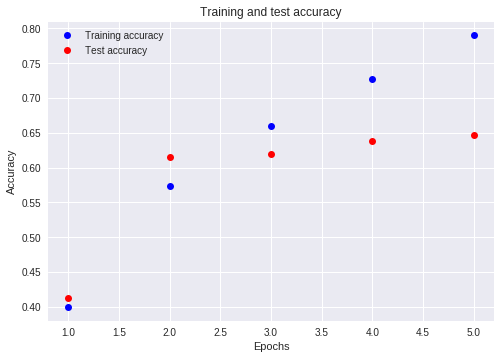

In [0]:
acc_values_one = history_dict_one['acc']
test_acc_values_one = history_dict_one['val_acc']

plt.plot(epochs_range_one, acc_values_one, 'bo', label='Training accuracy')
plt.plot(epochs_range_one, test_acc_values_one, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Does well on the validation set, but the test accuracy starts to fall with later epochs.

Model with only a filter and no maxpooling performs very slowly and poorly

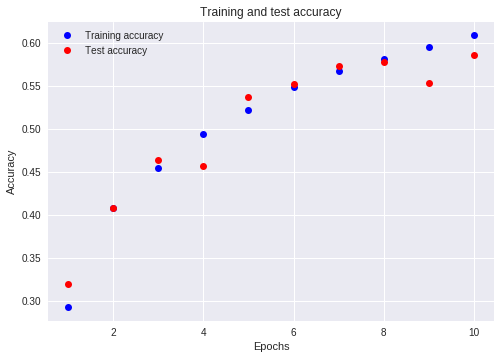

In [0]:
import matplotlib.pyplot as plt

history_dict = history_two.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

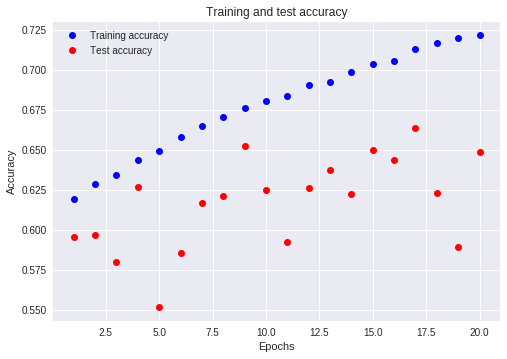

In [0]:
history_dict = history_three.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, 20 + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

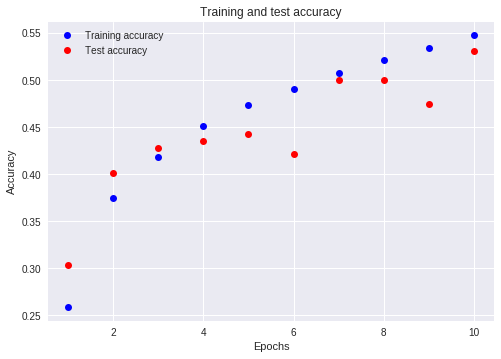

In [0]:
history_dict = history_four.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

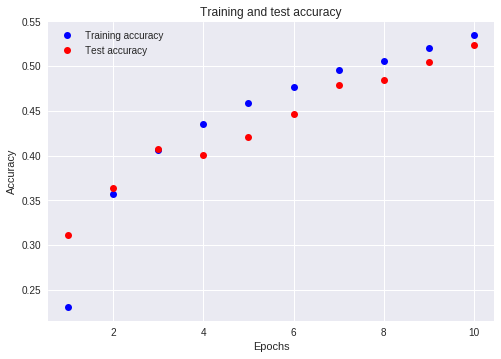

In [0]:
history_dict = history_five.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

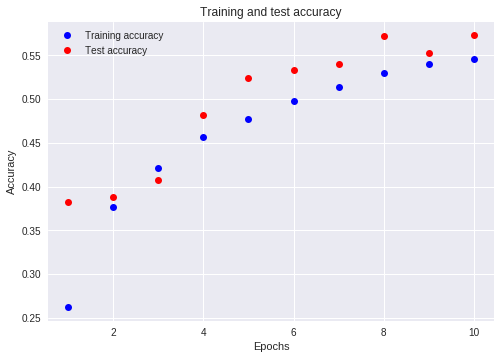

In [0]:
history_dict = history_six.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [0]:
history_dict = history_six.history
loss_values = history_dict['loss']
test_loss_values = history_dict['val_loss']
epochs_range = range(1, epochs + 1)

acc_values = history_dict['acc']
test_acc_values = history_dict['val_acc']

plt.plot(epochs_range, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs_range, test_acc_values, 'ro', label='Test accuracy')
plt.title('Training and test accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()